<a href="https://colab.research.google.com/github/Tanishqchahal/Self_Organising_Map/blob/main/Hybrid_SOM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##Importing the dataset

In [2]:
dataset = pd.read_csv('Credit_Card_Applications.csv')
dataset.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [3]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

##Feature Scaling

In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

##Training the SOM

In [5]:
!pip install minisom

In [6]:
from minisom import MiniSom
som = MiniSom(x = 12, y = 12, input_len = 15, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(X, num_iteration = 100)

##Visualising the Results

In [7]:
from pylab import bone, pcolor,colorbar, plot, show

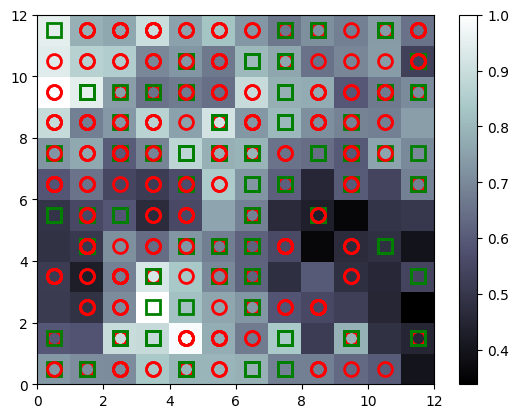

In [8]:
bone()
pcolor(som.distance_map(scaling = 'mean').T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0]+0.5, w[1]+0.5, markers[y[i]], markeredgecolor = colors[y[i]], markerfacecolor = 'None', markersize = 10, markeredgewidth = 2)
show()

##Automate fraud detection

In [9]:
Threshold = 0.9
xx = np.where(som.distance_map().T > Threshold)[1]
yy = np.where(som.distance_map().T > Threshold)[0]
cords = list(zip(xx,yy))
cords

[(4, 1), (3, 2), (3, 3), (5, 8), (1, 9)]

##Finding the potential frauds

In [10]:
mappings = som.win_map(X)

In [11]:
fraud = mappings[cords[0]]
for cord in cords[1:]:
    if len(mappings[cord])>0:
        fraud = np.concatenate((fraud, mappings[cord]), axis = 0)

In [12]:
fraud = sc.inverse_transform(fraud)
frauds = pd.DataFrame(fraud, columns = dataset.columns[:-1])
frauds['CustomerID'] = frauds['CustomerID'].astype(int)

In [13]:
frauds

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14
0,15642001,1.0,34.83,2.500,1.0,9.0,4.0,3.000,0.0,0.0,0.0,0.0,1.0,200.0,1.0
1,15642063,1.0,34.67,1.080,2.0,7.0,4.0,1.165,0.0,0.0,0.0,0.0,1.0,28.0,1.0
2,15735221,1.0,22.92,0.170,2.0,7.0,4.0,0.085,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,15656417,1.0,40.58,1.500,2.0,3.0,5.0,0.000,0.0,0.0,0.0,0.0,1.0,300.0,1.0
4,15599535,1.0,39.42,1.710,1.0,7.0,4.0,0.165,0.0,0.0,0.0,0.0,1.0,400.0,1.0
5,15772941,0.0,65.17,14.000,2.0,1.0,1.0,0.000,1.0,1.0,11.0,1.0,2.0,0.0,1401.0
6,15803378,1.0,34.92,5.000,2.0,14.0,8.0,7.500,1.0,1.0,6.0,1.0,2.0,0.0,1001.0
7,15654859,1.0,64.08,20.000,2.0,14.0,8.0,17.500,1.0,1.0,9.0,1.0,2.0,0.0,1001.0
8,15723827,1.0,76.75,22.290,2.0,10.0,9.0,12.750,1.0,1.0,1.0,1.0,2.0,0.0,110.0
9,15746995,1.0,34.75,15.000,2.0,12.0,7.0,5.375,1.0,1.0,9.0,1.0,2.0,0.0,135.0


##Going from unsupervised to supervised deep learning

In [14]:
customers = dataset.iloc[:, 1:].values
is_fraud = np.zeros(len(dataset))

In [15]:
for i in range(0, len(dataset)):
    if dataset.iloc[i, 0] in fraud:
        is_fraud[i] = 1

##Feature Scaling

In [16]:
from sklearn.preprocessing import StandardScaler
sc1 = StandardScaler()
customers = sc1.fit_transform(customers)

##Importing keras libraries

In [17]:
from keras.models import Sequential
from keras.layers import Dense

##Model Building

In [18]:
classifier = Sequential()

In [19]:
classifier.add(Dense(units = 6, kernel_initializer='uniform', activation = 'relu', input_dim = 15))

In [20]:
classifier.add(Dense(units = 1, kernel_initializer='uniform', activation = 'sigmoid'))

In [21]:
classifier.compile(optimizer = 'adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [22]:
classifier.fit(customers, is_fraud, batch_size = 1, epochs = 4)

Epoch 1/4
690/690 [==============================] - 8s 8ms/step - loss: 0.4118 - accuracy: 0.9406
Epoch 2/4
690/690 [==============================] - 5s 8ms/step - loss: 0.1884 - accuracy: 0.9406
Epoch 3/4
690/690 [==============================] - 6s 9ms/step - loss: 0.1624 - accuracy: 0.9406
Epoch 4/4
690/690 [==============================] - 4s 6ms/step - loss: 0.1509 - accuracy: 0.9406


##Predicting the probabilities of fraud

In [23]:
y_pred = classifier.predict(customers)

22/22 [==============================] - 0s 3ms/step


In [24]:
y_pred = np.concatenate((dataset.iloc[:,0:1].values,y_pred), axis = 1)

In [26]:
y_pred = y_pred[y_pred[:, 1].argsort()]
pd.DataFrame(y_pred)

,0,1
0,15757434.0,0.000247
1,15611409.0,0.000412
2,15752344.0,0.000435
3,15623210.0,0.000462
4,15813192.0,0.000500
...,...,...
685,15764444.0,0.360889
686,15799785.0,0.368541
687,15654859.0,0.381624
688,15585855.0,0.381624
